Wczytanie wyczyszconych danych

In [1]:
import ast
import pandas as pd

In [2]:
reviews = pd.read_csv('../cleaned_datasets/hotel_reviews.csv', sep='\t', encoding='utf-8')
reviews['review_clean_tokens'] = reviews['review_clean_tokens'].apply(ast.literal_eval)
reviews = reviews.dropna(how="any", axis=0)
reviews['label'] = reviews['label'].apply(lambda label: label - 1)
reviews

,label,review,length,review_clean_tokens,review_clean
0,3,nice hotel expensive parking got good deal sta...,593,"[nice, expens, park, got, good, deal, stay, an...",nice expens park got good deal stay anniversar...
1,1,ok nothing special charge diamond member hilto...,1689,"[ok, noth, special, charg, diamond, member, hi...",ok noth special charg diamond member hilton de...
2,2,nice rooms not 4* experience hotel monaco seat...,1427,"[nice, room, experi, monaco, seattl, good, nt,...",nice room experi monaco seattl good nt levelpo...
3,4,"unique, great stay, wonderful time hotel monac...",600,"[uniqu, great, stay, wonder, time, monaco, loc...",uniqu great stay wonder time monaco locat exce...
4,4,"great stay great stay, went seahawk game aweso...",1281,"[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...
...,...,...,...,...,...
20486,4,"best kept secret 3rd time staying charm, not 5...",733,"[best, kept, secret, time, stay, charm, nt, be...",best kept secret time stay charm nt beat time ...
20487,3,great location price view hotel great quick pl...,306,"[great, locat, price, view, great, quick, plac...",great locat price view great quick place sight...
20488,1,"ok just looks nice modern outside, desk staff ...",443,"[ok, look, nice, modern, outsid, desk, staff, ...",ok look nice modern outsid desk staff nt parti...
20489,0,hotel theft ruined vacation hotel opened sept ...,5557,"[theft, ruin, vacat, open, sept, guest, week, ...",theft ruin vacat open sept guest week happi st...


Wizualizacja tokenów

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

1 gwiazdka

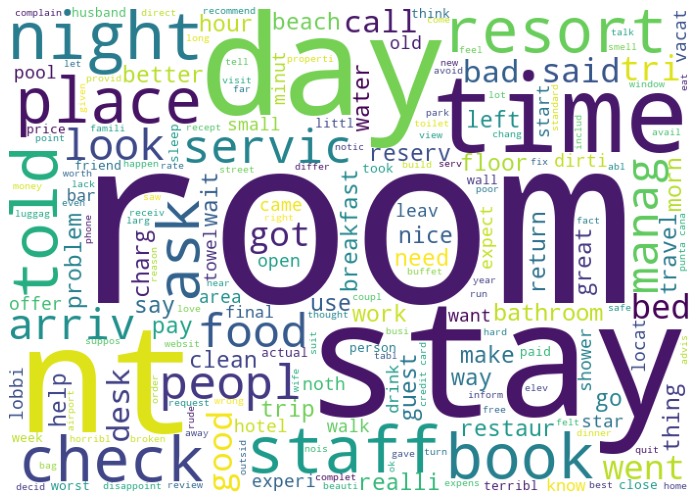

In [4]:
one_star_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
one_star_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 0, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(one_star_word_cloud)
plt.show()

2 gwiazdki

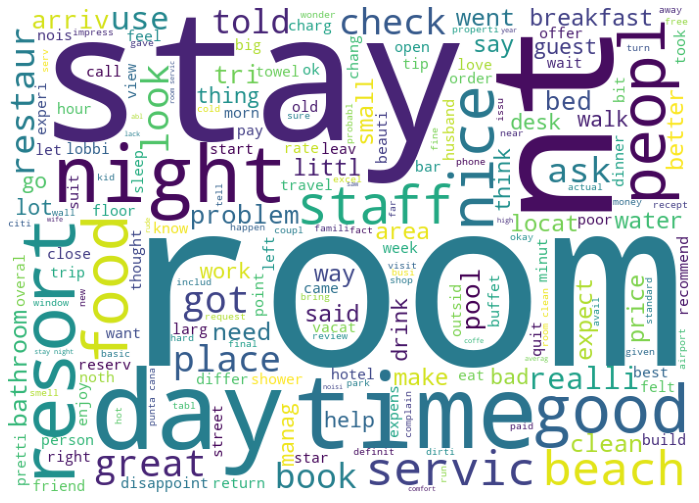

In [5]:
two_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
two_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 1, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(two_stars_word_cloud)
plt.show()

3 gwiazdki

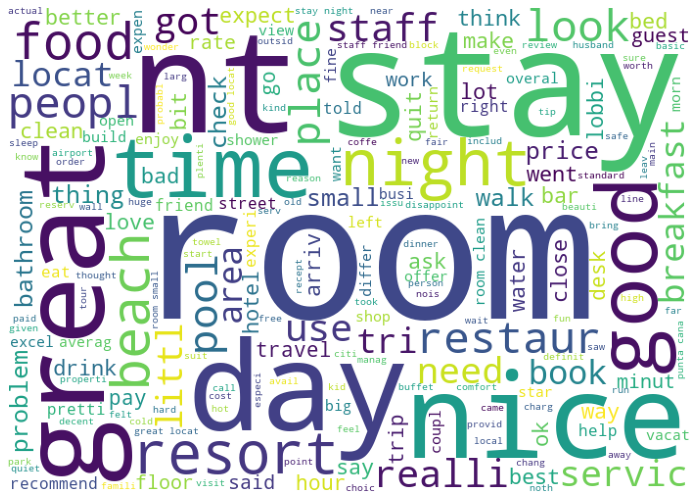

In [6]:
three_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
three_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 2, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(three_stars_word_cloud)
plt.show()

4 gwiazdki

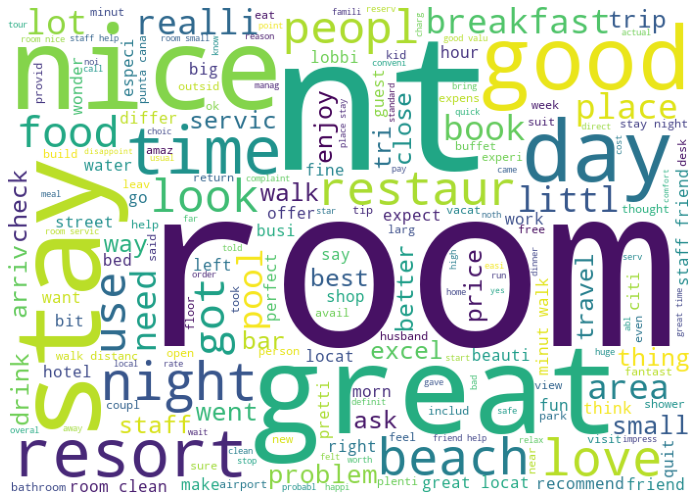

In [7]:
four_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
four_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 3, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(four_stars_word_cloud)
plt.show()

5 gwiazdek

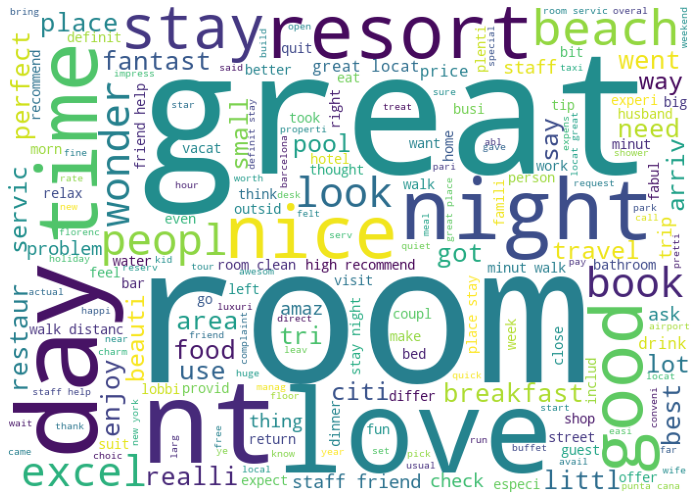

In [8]:
five_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
five_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 4, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(five_stars_word_cloud)
plt.show()

Wektoryzacja

In [9]:
x = reviews['review_clean']
y = reviews['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1337)

count_vectorizer = CountVectorizer(
	stop_words='english',
	ngram_range=(1, 2),
	max_features=100
)

x_train_count_matrix = count_vectorizer.fit_transform(x_train)
x_test_count_matrix = count_vectorizer.transform(x_test)

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_count_matrix)
x_test_tfidf = tfidf_transformer.transform(x_test_count_matrix)

Modelowanie

In [12]:
# multinomial bayes

from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train_tfidf, y_train)
y_pred_class = multinomial_nb.predict(x_test_tfidf)
y_pred_prob = multinomial_nb.predict_proba(x_test_count_matrix)[:, 1]

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

0.47523786289338865


array([[   9,    2,    0,   19,  254],
       [   3,    0,    0,   60,  296],
       [   0,    1,    0,  123,  313],
       [   1,    0,    0,  196, 1011],
       [   0,    0,    0,   68, 1743]], dtype=int64)

In [14]:
# svm
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train_tfidf, y_train)
y_pred_class = svm.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5440351305196389


In [15]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 146,   60,    7,   28,   43],
       [  70,   89,   18,  105,   77],
       [  17,   53,   28,  239,  100],
       [  19,   33,   17,  564,  575],
       [  21,   29,    9,  349, 1403]], dtype=int64)

In [16]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_tfidf, y_train)
y_pred_class = knn.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test, y_pred_class))

0.45035374481580875


Tokenizacja lstm

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews['review_clean'])
total_words = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(reviews['review_clean'])
max_sequence_len = min(max(len(seq) for seq in sequences), 100)
padded_sequences = pad_sequences(
	sequences,
	max_sequence_len,
	padding='pre'
)
x_lstm = padded_sequences
y_lstm = reviews['label']
x_lstm_train, x_lstm_test, y_lstm_train, y_lstm_test = train_test_split(x_lstm, y_lstm, train_size=0.8, stratify=y_lstm, random_state=1337)

In [18]:
from keras import Sequential
from keras import layers
# lstm
model = Sequential()
model.add(layers.Embedding(input_dim=total_words, output_dim=64, input_length=max_sequence_len))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(
    x_lstm_train,
    y_lstm_train,
    epochs = 5,
    batch_size = 16,
	validation_data = (x_lstm_test, y_lstm_test),
)

Epoch 1/5
1025/1025 [==============================] - 64s 61ms/step - loss: 1.1792 - accuracy: 0.4751 - val_loss: 1.0569 - val_accuracy: 0.5306
Epoch 2/5
1025/1025 [==============================] - 64s 63ms/step - loss: 0.8919 - accuracy: 0.6099 - val_loss: 0.9707 - val_accuracy: 0.5633
Epoch 3/5
1025/1025 [==============================] - 62s 61ms/step - loss: 0.6484 - accuracy: 0.7347 - val_loss: 1.0255 - val_accuracy: 0.5750
Epoch 4/5
1025/1025 [==============================] - 62s 60ms/step - loss: 0.4171 - accuracy: 0.8455 - val_loss: 1.2640 - val_accuracy: 0.5679
Epoch 5/5
1025/1025 [==============================] - 62s 61ms/step - loss: 0.2447 - accuracy: 0.9179 - val_loss: 1.7700 - val_accuracy: 0.5489


In [20]:
model.save('hotel_reviews_model.h5')